<a href="https://colab.research.google.com/github/arthurzhao234/CSE30/blob/main/NB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Search Algorithms




*by Dr. Larissa Munishkina, November, 2024*


##Objectives
The purpose of this notebook is to provide you with knowledge of implementing and applying search algorithms to solve various problems in programming.

You will solve the famous $n$-queens problem using permutations, implement a hash table for fast retrieval of data, and apply a divide-and-conquer algorithm, a bisection method, to solve polynomials.

##Overview

An **algorithm** is a finite sequence of mathematically rigorous instructions used to solve a class of specific problems.

[A search algorithm](https://en.wikipedia.org/wiki/Search_algorithm) is an algorithm used to find a specific item or group of items within a collection of data.

Search algorithms are essential in computer science for data retrieval, optimization, and problem-solving. There are different types of search algorithms:

* **Brute-force search** is a problem-solving method of systematically trying every possible option until the optimal solution is found. This approach can be very time-consuming.

* **A divide-and-conquer algorithm** repeatedly reduces a problem to one or more smaller parts until the parts are small enough to be solved easily.

* **Reduction of complexity** transforms difficult problems into better-known solvable problems. This technique is also known as transform and conquer.

###Applications of Search Algorithms

Combinatorial optimization:
* The vehicle routing problem, a form of a shortest path problem
* The knapsack problem: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.
* In game theory choosing the best next move (a minimax algorithm)
* The nurse scheduling problem
* Search engine optimization and content optimization for web crawlers

Problems in constraint satisfaction:
* The map coloring problem
* Soving a sudoku or crossword puzzle

Retrieval and lookup:
* Retrieving a record from a database
* Finding the maximum or minimum value in a list or array
* Checking if a given value is present in a set of values
* Finding a valid combination or password
* Factoring an integer (in number theory and cryptography)

In this notebook, you will be introduced to three different search methods. The first method is a brute-force search that is based on calculation of all possible combinations. The second method is using a hash table to collect and retrieve data when needed. The third method is a divide-and-conquer method to search only neccesary subdomains of the whole domain used in searching.  

##Brute-Force Search and the $n$-Queens Problem
**Brute-force search** is a problem-solving method of systematically trying every possible option until the optimal solution is found. This approach is time-consuming.

For example, if we want to find the best move in a tic-tac-toe game, we can examine all possible moves and find which one results in winning the game. So, if we start from the beginning we can calculate all possible moves which is $9$ because there are $9$ cells in the tic-tac-toe board. But we do not know which move will result in winning. So, we need to continue choosing next moves. Choosing moves in sequence is actually playing a game. So, we can make $9!=362,880$ moves at the maximum to play a game.

In reality, the number of all [possible tic-tac-toe games](http://www.se16.info/hgb/tictactoe.htm) is $255,168$ due to games that are completed in less than 9 steps. Some people consider the board symmetry and calculate the total number of games to be $26,830$.    

A minimax algorithm for a tic-tac-toe game is based on a brute-force approach because it plays all possible games before choosing the best move. As you may notice, this strategy requires a lot of computation and cannot be applied to playing chess or Gomoku (a more advanced version of a tic-tac-toe game).

There are many games and other problems that can be solved using brute-force search. We can solve Sudoku puzzles, crosswords, and the $n$-queens problem using brute-force search. However, it is often desired to decrease the complexity of the task (decrease the function domain for search).

We can use reduction of complexity in solving the $n$-queens problem.



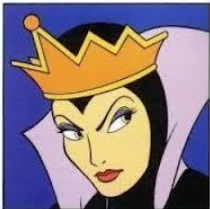
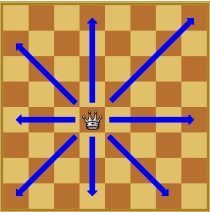

First, let's review the famous **Eight-Queens Puzzle**. The [eight-queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is the problem of placing eight chess queens on an $8\times8$ chessboard, so that no two queens threaten each other, i.e., no two queens share the same row, column, or diagonal (See the queens movements on the picture above).

There are $92$ solutions for the eight-queens puzzle. One of the solutions is shown on the picture below.

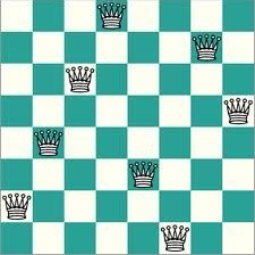


The eight queens puzzle is an example of the more general $n$-queens problem of placing $n$ non-attacking queens on an $n \times n$ chessboard, for which solutions exist for all natural numbers $n$ with the exception of $n = 2$ and $n = 3$.

We can use a brute-force algorithm that generates all possible permutations of the positions of $n$ queens on the chess board and check if they are solutions to the problem; however, this method is very inefficient, i.e., it requires to examine $\frac{(n^2)!}{(n^2 - n)!n!}$ possible arrangements.

* We can simplify the problem by changing its objective: instead of finding the solution for the $n$-queens problem, we can find solutions for the $n$-rooks problem.

* The $n$-rooks problem is easy to solve. We need to place each rook at a different column and a row. This can be achieved by using a one-dimensional array, where a value in the array and its index correspond to the row and column where a rook is located.

* We can use permutation of $n$-dimensional array to find all possible arrangements of $n$ rooks on the $n \times n$ board. So, we need to check only $n!$ possible arrangements.

* For example, $[1, 2, 3, 4, 5, 6, 7, 8]$ is an array where the first rook is positioned at row $1$ and column $1$, the second rook  is positioned at row $2$ and column $2$, and so on.

* The permutations $[2, 4, 6, 8, 3,1, 7, 5]$ and $[2, 7, 8, 5,1, 4, 6, 3]$ are shown on the pictures below.

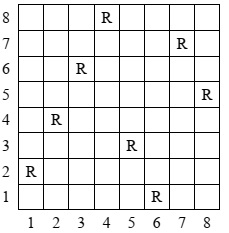
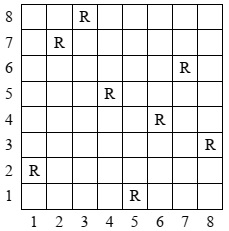

Now, we just need to check if these solutions to the $n$-rooks problem are also solutions to the $n$-queens problem. We need to check if the queens are on the same diagonal.

To find if the queens are on the same diagonal, we can compare the differences between rows and columns. If the differences are the same, then the queens are on the diagonal, so we can discard this $n$-rooks solution and check the next.



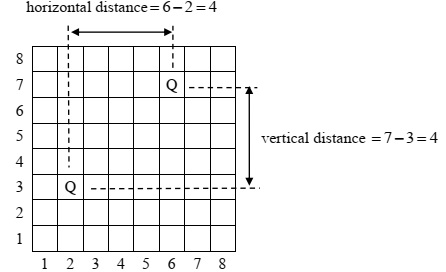

Now, you can complete **Question 1** in the **Exercises** section.

##A Hash Table

We often need to collect and store data for future retrieval. The question is 'How can we search for an already discovered item efficiently?'.

We can build a special data structure called ***hash table*** that can efficiently retrieve data.

A hash table is not just a simple lookup table -- it has a hash function to add a record at the correct place, a rehash method to maintain its efficiency, and a collision resolution technique to maintain its functionality.

Data collections such as a dictionary and a set in Python and other programming languages are implemented using hash tables.

A **hash table** is a data structure that implements an associative array (also called a ***dictionary*** or ***map***) that maps keys (the function domain) to values (the function range). A hash table uses a **hash function** to compute an index in the array, where values are stored.

* A[ hash table](https://en.wikipedia.org/wiki/Hash_table) is implemented as an array $A$ of length $m$ that is filled with $n$ elements, where $m \ge n$. A key-value $x$ and $y$ gets stored at an index location $A[i]$, where $i$ is an index calculated by a hash function $h$, i.e, $i = h(x)$ and $i < m$.

* A [hash function](https://en.wikipedia.org/wiki/Hash_function) is typically imperfect and produces collisions, i.e., the hash function generates the same index for more than one key. There are two main methods that resolve collisions:

    * Chaining
    * Open addressing

* **Chaining** resolves collisions by building a linked list with key-value pairs $(x, y)$ for each array index $i = h(x)$. The collided items, e.g., items that have different keys $x_1$ and $x_2$ but the same hash code $h(x_1)=h(x_2)$, are chained together through a single linked list, which can be traversed to access the item with a unique key.

* **Open addressing** resolves collision through probing. When a new entry $(x, y)$ has to be inserted, the slot with the index corresponding to the hashed key $h(x)$ is examined first; if it is occupied, other slots are examined according to probing until an unoccupied slot is found.

* A **load factor** $\alpha$ is an important characteristic of a hash table. It is calculated in the following way:

    $\alpha = n/m$

    where $n$ is the number of entries in the hash table and $m$ is the number slots (indexes in the hash table array).

The performance of the hash table strongly depends on the load factor. If the load factor is large, then there are a lot of collisions, the search becomes linear and inefficient.
    
We can resize (rehash) the hash table whenever the load factor exceeds the maximum value. Also, the table may be resized if the load factor drops below the minimum value to save memory. The minimum and maximum values are constants that are arbitrary chosen to control the behavior (the load factor) of the hash table.

You can complete **Question 2** in the **Exercises** section.

##Divide-and-Conquer Algorithms and the Bisection Method

A ***divide-and-conquer algorithm*** is an algorithm that recursively breaks down a problem into subproblems until these subproblems become simple enough to be solved directly. The solutions to the subproblems can be combined to give a solution to the original problem.

A divide-and-conquer algorithm is used in various applications:
* sorting (e.g., quicksort, merge sort)
* multiplying large numbers (e.g., the Karatsuba algorithm)
* finding the closest pair of points
* syntactic analysis (e.g., top-down parsers)
* computing the discrete Fourier transform (FFT)

In this notebook, we will overview a bisection method that is based on a divide-and-conquer algorithm. The bisection method is used to find real polynomial roots.

A polymonial $a_nx^n + a_nx^n + ... + a_2x^2 + a_1x + a_0$ is a continuous function that can be graphically represented as a curved line in the Cartesian coordinate system.

To find the real roots of a polynomial function, we must find the $x$ coordinates of the points on the $x$-axis, where the curve crosses it.

We can use a bisection method because it can be applied to any continuous functions (including polynomials) that crosses the $x$-axis in a given interval. The purpose is to find the $x$ coordinate of the point where the function crosses the $x$-axis. The algorithm repeatedly bisects the interval and selects the smaller subinterval, in which the function changes sign and therefore contains a root.

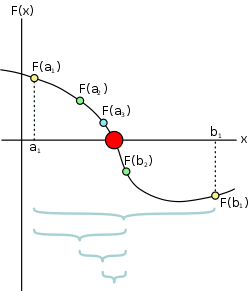

Here is a pseudocode of the bisection method. Assume, that $f(x)$ is a given polynomial function, $[a, b]$ is a given interval, and $t$ is a tolerance (the precision of the root).

* Find that $f(a)$ and $f(b)$ have opposite signs.
* Calculate $c$, the midpoint of the interval, $m = (a + b)/2$.
* Calculate the function value at the midpoint, $f(m)$.
* If convergence is satisfactory (that is, $|m - a| < t$), return $m$ and stop iterating.
* Otherwise, examine the sign of $f(m)$ and replace either $(a, f(a))$ or $(b, f(b))$ with $(m, f(m))$, so that there is a zero crossing within the new interval.

There are several problems with this code:

* If the function crosses the $x$-axis several times, then all roots will not be found.
* If the function does not cross the $x$-axis, but touches it, the root will not be found.

We can improve the algorithm by dividing a given interval into subintervals with some resolution $r$, where $|a - b| < r$ and then search the roots on all these subintervals.  

In order to find an even root ([double root](https://en.wikipedia.org/wiki/Multiplicity_(mathematics)#Multiplicity_of_a_root_of_a_polynomial)) that correspond to $x$ where the function touches the $x$-axis, so $f(x) = 0$ or $f(x) < s$, where $s$ is a threshold, we need to take a derivative of the function and find its regular (or odd) roots that will be roots for the original function.

You are now ready to complete **Question 3** in the **Exercises** section.

#Exercises

##Question 1: The $n$-Queens Problem

In this exercise, you need to write a function `solve_queens(n)` that solves the $n$-Queens Problem. The parameter `n` is a number of queens that should be placed on an $n \times n$ chessboard.

The function should return a set of tuples, where each tuple corresponds to a solution. For example:
* If there are no solutions, the function should return an empty set `set()`.
* If there are solutions, the function should return a set of tuples `{(2, 4, 1, 3), (3, 1, 4, 2)}`. These are the solutions for the $4$-queens problem.  

You may need to use the function `all_perms` that returns an iterator of all permutations of a given list.

**NOTE:** Please read the section ***Brute-Force Search and the n-Queens Problem*** above to complete this exercise.

In [ ]:
#@title Implementing an n-queens solver
def all_perms(elements):
    if len(elements) <= 1:
        yield elements
    else:
        for perm in all_perms(elements[1:]):
            for i in range(len(elements)):
                yield perm[:i] + elements[0:1] + perm[i:]

def solve_queens(n):
  solutions=set()
  for perm in all_perms(list(range(1, n + 1))):
    ok = True
    for i in range(n):
      for j in range(i + 1, n):
        if abs((i + 1) - (j + 1)) == abs(perm[i] - perm[j]):
          ok = False
          break
      if not ok:
          break
    if ok:
      solutions.add(tuple(perm))
  return solutions


Let's test the function `solve_queens`.

In [ ]:
# Tests 10 points.

assert solve_queens(1) == {(1,)}
assert solve_queens(2) == set()


In [ ]:
# Tests 20 points.

assert solve_queens(4) == {(2, 4, 1, 3), (3, 1, 4, 2)}

assert solve_queens(5) == {(1, 3, 5, 2, 4), (1, 4, 2, 5, 3), (2, 4, 1, 3, 5),
                           (2, 5, 3, 1, 4), (3, 1, 4, 2, 5), (3, 5, 2, 4, 1),
                           (4, 1, 3, 5, 2), (4, 2, 5, 3, 1), (5, 2, 4, 1, 3),
                           (5, 3, 1, 4, 2)}

##Question 2: A Hash Table with Chaining

In this notebook, we will use the following interface of a Hash Table ADT:

* `Hashtable()` creates a hash table object.
* `get(key)` returns the value corresponding to the key if the key is present in the hash table; otherwise, returns `None`.
* `size` returns the size of the hash table array.
* `add(key, value)` adds a new `(key, value)` pair to the hash table, if the key is already present, updates its value.
* `remove(key)` removes the `(key, value)` pair specified by the key.
* `is_empty()` returns `True` if there are no items in the hash table, otherwise, `False`.
* `len (hashtable)` returns the number of items in the hash table.

We will use a very simplified implementation of a hash table, where the hash table array and linked lists are implemented as lists. Thus, instead of using an array of linked lists, we use a nested list. However, to access an inner list (a linked list), we use an index operation on the outer list, but to access an item in the inner list, we need to traverse the inner list (we use a for loop).

Also, our hash table is not resizable, and the hash function is very primitive and used only with ASCII strings and integers (strings of digits).

**IMPORTANT NOTES:**
* The variable `self.table` is a nested list. The outer list has the default size 11.
* The size of the hash table is small, and the hash function produces collisions to check the functionality of the hash table implementation.
* To retrieve an item by its key, first, we hash the key into an index, retrieve the inner list at this index, and perform a linear search on the list to get the item value. Please check the implementation of the method `get`.


There are two methods that you need to implement:

* `add(key, value)` adds an item and increments `self.__items`.
* `remove(key)` removes an item and decrements `self.__items`.

**NOTE:**
* Do not use a dictionary or set in implementing your hash table.
* You can add an item to the hash table as a tuple pair with the key and value`(key, value)`. You need to use the hash function to find what inner list you must use. Then, add the tuple to the list (for example, use the list method `append`).
* To remove a key, you need to hash the key, get the corresponding inner list and search the list for the key. When you find the key, you need to remove the tuple pair. You can use the list method `remove`.

In [ ]:
#@title Implementing a hash table
class Hashtable:
    '''A Hashtable class implementation.'''

    def __init__(self, size = 11):
       '''Sets the data attributes of the hash table.'''
       self.table = [[] for i in range(size)]
       self.__size = size
       self.__items = 0

    def is_empty(self):
        ''' Returns True if the hash table is empty.'''
        return not any(self.table)

    def __len__(self):
        ''' Returns the number of items in the hash table.'''
        return self.__items

    @property
    def size(self):
        ''' Returns a size of the hash table.'''
        return self.__size

    def hash(self, key):
        ''' Returns a hash code as an integer for an ASCII string only.'''
        n = 0
        key = str(key)
        for i in range(len(key)):
            n += ord(key[i])
        return n % self.__size

    def get(self, key):
        ''' Returns the value of a key.'''
        h = self.hash(key)
        for item in self.table[h]:
            if item[0] == key:
                return item[1]
        return None

    def add(self, key, value):
        ''' Adds an item to the hash table.'''
        h=self.hash(key)
        for i, item in enumerate(self.table[h]):
          if item[0] == key:
              self.table[h][i] = (key, value)
              return
        self.table[h].append((key, value))
        self.__items += 1

        ### YOUR SOLUTION HERE

    def remove(self, key):
        ''' Removes an item from the hash table.'''
        ### YOUR SOLUTION HERE

        h = self.hash(key)
        for i, item in enumerate(self.table[h]):
            if item[0] == key:
                del self.table[h][i]
                self.__items -= 1
                return True
        return False

Let's check the hash table implementation.

In [ ]:
zodiac = ['rat', 'cow', 'tiger', 'rabbit', 'dragon', 'snake',
          'horse', 'sheep', 'monkey', 'chicken', 'dog', 'pig']

# create a hash table with key-value pairs: 'rat': 1, 'cow': 2, 'tiger': 3, etc.
h = Hashtable()
for i in range(len(zodiac)):
    h.add(zodiac[i], i+1) # a key is zodiac[i], a value is i+1

# print the hash table items
for key in zodiac:
    print(key, h.get(key))

rat 1
cow 2
tiger 3
rabbit 4
dragon 5
snake 6
horse 7
sheep 8
monkey 9
chicken 10
dog 11
pig 12


In [ ]:
# Tests 10 points.

print(h.table)
table = [[('tiger', 3)],
         [('rabbit', 4), ('pig', 12)],
         [('snake', 6)],
         [],
         [],
         [('sheep', 8)],
         [('horse', 7), ('dog', 11)],
         [],
         [('rat', 1), ('dragon', 5)],
         [],
         [('cow', 2), ('monkey', 9), ('chicken', 10)]]
for i in range(h.size):
    assert set(h.table[i]) == set(table[i])

[[('tiger', 3)], [('rabbit', 4), ('pig', 12)], [('snake', 6)], [], [], [('sheep', 8)], [('horse', 7), ('dog', 11)], [], [('rat', 1), ('dragon', 5)], [], [('cow', 2), ('monkey', 9), ('chicken', 10)]]


Let's check that the method `get` works correctly.

In [ ]:
# Tests 5 points.

for i in range(len(zodiac)):
    assert h.get(zodiac[i]) == i+1

Let's check the function `len` and property `size`.

In [ ]:
# Tests 5 points.

assert h.size == 11
assert len(h) == 12

Let's test the method `remove`.

In [ ]:
# Tests 10 points.

for i in zodiac:
    h.remove(i)
assert h.is_empty()
assert len(h) == 0
assert h.size == 11

Finally, let's check that the add method works correctly for updates.

In [ ]:
# Tests 10 points.

h.add(zodiac[2], 3)
print(h.table)
assert h.table[0] == [('tiger', 3)]

h.add(zodiac[2], 2)
print(h.table)
assert h.table[0] == [('tiger', 2)]

[[('tiger', 3)], [], [], [], [], [], [], [], [], [], []]
[[('tiger', 2)], [], [], [], [], [], [], [], [], [], []]


##Question 3: Finding Real Polynomial Roots by Bisection

To find real polynomial roots, we use a bisection method. The main function `solve` is already implemented. It finds real roots of any polynomial functions on a given interval with resolution $10^{-2}$, tolerance $10^{-5}$, and threshold $10^{-3}$.

The function `solve` has five parameters:
* coefficients
* interval
* resolution with the default value of $10^{-2}$
* tolerance with the default value of $10^{-5}$
* threshold with the default value of $10^{-3}$

The resolution, tolerance and threshold are defined as follows:
* $s$ is a threshold used to check if $f(x) < s$, meaning that the function touches the $x$-axis.
* $t$ is a tolerance used to terminate the bisection procedure: if $|m - a| < t$, then bisecting should be stopped, where $m$ is the middle point and $a$ is the left endpoint of the interval $[a, b]$.
* $r$ is a resolution that defines the size of intervals that are used for bisection methods: $|a - b| < r$

The function `solve` depends on the function `bisection` that you need to implement. The function `bisection` is based on the bisection method described above. It should return a root with a given tolerance or `None` if a root does not exist. It takes four parameters:

* `c` is a tuple of polynomial coefficients
* `a` is the left endpoint of the interval $[a, b]$
* `b` is the right endpoint of the interval $[a, b]$
* `tolerance` is the tolerance.

**NOTE:**

* The pseudocode is provided to you above in the section ***Divide-and-Conquer Algorithms and the Bisection Method***.  
* Coefficients define the polynomial, i.e., given a polynomial $a_nx^n + a_{n-1}x^{n-1} + ... + a_2x^2 + a_1x + a_0$, we can use only coefficents $a_0, a_1, a_2, ..., a_{n-1}, a_n$ to reconstruct the polynomial if needed.

    Please check how the `func` function that calculates the polynomial function is implemented.



In [7]:
#@title Implementation of solving polynomials by bisection

def solve(coefficients, interval, resolution = 1e-2,
          tolerance = 1e-5, threshold = 1e-3):
    ''' Returns all polynomial roots on the given interval.'''
    roots = set()
    a, b = interval

    # we extract the tolerance exponent for rounding
    t = abs(int('{:e}'.format(tolerance).split('e')[1]))

    # we calculate coefficients for the derivative
    coeff_der = [(i+1)*coefficients[i+1] for i in range(len(coefficients)-1)]

    while a < b:
        root = bisection(coefficients, a, a + resolution, tolerance)

        if root != None:
            roots.add(round(root, t))
        else:
            root = bisection(coeff_der, a, a + resolution, tolerance)
            if root != None:
                if abs(func(root, coefficients)) < threshold:
                    roots.add(round(root, t))

        a += resolution

    return roots

def bisection(c, a, b, tolerance):
    ''' Returns a polymonial root on the given interval or None.'''
    ### YOUR SOLUTION HERE
    fa = func(a, c)
    fb = func(b, c)
    if fa == 0:
        return a
    if fb == 0:
        return b
    if fa * fb > 0:
        return None
    it = 0
    while (b - a) > tolerance:
        m = (a + b) / 2.0
        fm = func(m, c)

        if fm == 0:
            return m

        if fa * fm < 0:
            b, fb = m, fm
        else:
            a, fa = m, fm

        it += 1
    return (a + b) / 2.0


def sign(x, c):
    ''' Returns the function sign. '''
    result = func(x, c)
    if result > 0:
        return 1
    elif result < 0:
        return -1
    else:
        return 0

def func(x, c):
    ''' Returns the function value.'''
    result = 0
    for i in range(len(c)):
        result += x**i * c[i]
    return result

Let's check the polynomial solver. First, we will plot the points using matplotlib and numpy libraries to visualize the polynomial curve. Then, we check if the solver returns the correct roots.

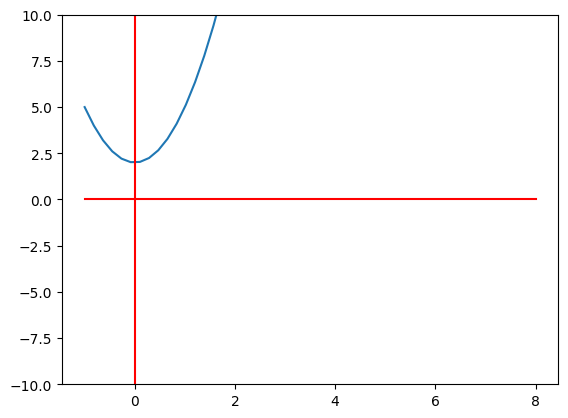

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 8, 50)         # create 50 points in the interval [-1, 8]
y = np.linspace(-100, 100, 50)     # create 50 points in the interval [-100, 100]
plt.plot(x, func(x, (2, 0, 3)))    # plot a parabola y = 2 + 0x + 3x^2
plt.ylim(-10, 10)                  # you can comment out this statement
plt.plot(x, x*0, color='red')      # plot the x-axis
plt.plot(y*0, y, color='red')      # plot the y-axis
plt.show()

In [8]:
# Tests 10 points.

coefficients = (2, 0, 3)
interval = (-1, 8)
print(solve(coefficients, interval)) # the parabola does not touch the x-axis
assert solve(coefficients, interval) == set()

set()


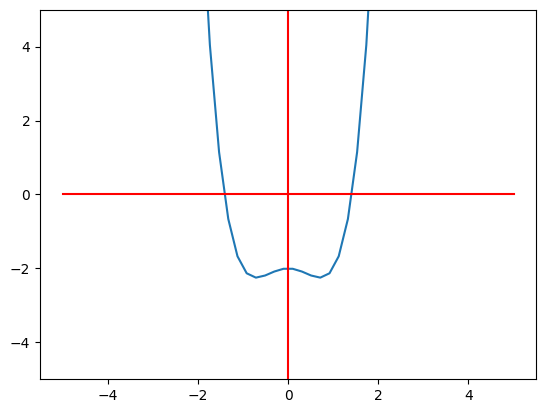

In [4]:
x = np.linspace(-5, 5, 50)              # create 50 points in the interval [-5, 5]
y = np.linspace(-100, 100, 50)          # create 50 points in the interval [-100, 100]
plt.plot(x, func(x, (-2, 0, -1, 0, 1))) # plot y = -2 + 0x - x^2 + 0x^3 + x^4
plt.ylim(-5, 5)                         # you can comment out this statement

plt.plot(x, x*0, color='red')           # plot the x-axis
plt.plot(y*0, y, color='red')           # plot the y-axis
plt.show()

In [9]:
# Tests 10 points.

print(solve((-2, 0, -1, 0, 1), (-5, 5)))
assert solve((-2, 0, -1, 0, 1), (-5, 5)) == {-1.41421, 1.41421}

{1.41421, -1.41421}


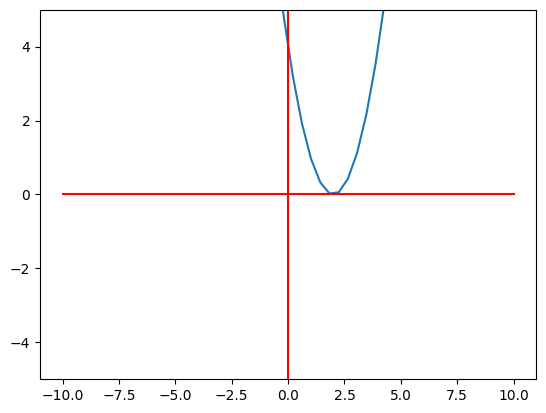

In [6]:
x = np.linspace(-10, 10, 50)            # create 50 points in the interval [-10, 10]
y = np.linspace(-100, 100, 50)          # create 50 points in the interval [-100, 100]
plt.plot(x, func(x, (4, -4, 1)))        # plot y = 4 - 4x + x^2
plt.ylim(-5, 5)                         # you can comment out this statement

plt.plot(x, x*0, color='red')           # plot the x-axis
plt.plot(y*0, y, color='red')           # plot the y-axis
plt.show()

Please note that we have a double root. If we round the two roots to the 10,000th, we obtain instead of two roots one root with value 2.

In [10]:
# Tests 10 points.

roots = solve((4, -4, 1), (-10.0, 10.0))
print(roots)
assert roots == {1.99999, 2.00001} or roots == {2.0}

{2.0}
